# Cài đặt thư viện

In [141]:
## Tải package cần thiết
!pip install pycountry
!pip install -U ridgeplot

In [142]:
## Package
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as pl
import pycountry
import warnings
import os as os
import scipy.stats as ss
from ridgeplot import ridgeplot
from datetime import datetime, timedelta
from itertools import product
from scipy.stats import pearsonr

In [143]:
## Bỏ qua các cảnh báo
np.seterr(divide = 'ignore')
warnings.filterwarnings('ignore')

# Tải bộ dữ liệu

In [144]:
## Tạo dataframe từ tập tin Sample - Superstore.csv
df = pd.read_csv('Sample - Superstore.csv', encoding='windows-1252')

# Tiền xử lý dữ liệu

## 1. Thăm dò dữ liệu (Data Exploration)

In [145]:
print(f'Kích thước của bộ dữ liệu gồm {df.shape[0]} dòng và {df.shape[1]} cột.')

Kích thước của bộ dữ liệu gồm 9994 dòng và 21 cột.


In [146]:
## Hiển thị thông tin bộ dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [147]:
## Hiển thị bộ dữ liệu
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [148]:
## Hiển thị kiểu dữ liệu của các cột đang có
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [149]:
## Chuyển đổi các cột kiểu dữ liệu thời gian sang datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%m/%d/%Y")
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format="%m/%d/%Y")

In [150]:
## Chuyển đổi cột Postal Code có kiểu dữ liệu numeric sang dạng object
df['Postal Code'] = df['Postal Code'].astype('object')

In [151]:
## Xóa cột 'Row ID'
df = df.drop(['Row ID'], axis=1)

In [152]:
## Hiển thị kiểu dữ liệu của các cột đang có sau khi đã chuyển đổi
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [153]:
## Thống kê mô tả các cột có kiểu dữ liệu numerical
df.describe(include = 'number')

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [154]:
## Thống kê mô tả các cột có kiểu dữ liệu object
df.describe(include = 'object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,631,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,10035,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,263,3203,19,6026,1523,48


## 2. Làm sạch dữ liệu (Data Cleaning)

### 2.1. Dữ liệu bị thiếu (Missing Values)

In [155]:
## Kiểm tra số giá trị rỗng trong mỗi cột
missing_values = df.isnull().sum()
missing_values

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### 2.2. Dữ liệu bị nhiễu (Noisy Values)

In [156]:
# Sử dụng hàm để kiểm tra outlier cho tất cả các cột trong DataFrame
def check_outliers_using_3_sigma(df):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Kiểm tra chỉ xử lý các cột số
            lech3sigma_tren = round(df[col].mean() + 3 * df[col].std(ddof=1))
            lech3sigma_duoi = round(df[col].mean() - 3 * df[col].std(ddof=1))
            df_filter = df[(df[col] > lech3sigma_tren) | (df[col] < lech3sigma_duoi)]

            if df_filter[col].count() > 0:
                print(f'Cột {col} có {df_filter[col].count()} giá trị nhiễu là các giá trị ngoài khoảng ({lech3sigma_duoi}, {lech3sigma_tren})')
            else:
                print(f'Cột {col}: Không có outlier.')

check_outliers_using_3_sigma(df)

Cột Sales có 127 giá trị nhiễu là các giá trị ngoài khoảng (-1640, 2100)
Cột Quantity có 113 giá trị nhiễu là các giá trị ngoài khoảng (-3, 10)
Cột Discount: Không có outlier.
Cột Profit có 107 giá trị nhiễu là các giá trị ngoài khoảng (-674, 731)


In [157]:
print(f'Sau khi tiền xử lý dữ liệu, kích thước của bộ dữ liệu gồm: {df.shape[0]} dòng, {df.shape[1]} cột')

Sau khi tiền xử lý dữ liệu, kích thước của bộ dữ liệu gồm: 9994 dòng, 20 cột


# Biểu diễn trực quan dữ liệu.

## Biểu đồ thể hiện tổng số.

Biểu đồ thể hiện doanh thu theo từng ban.

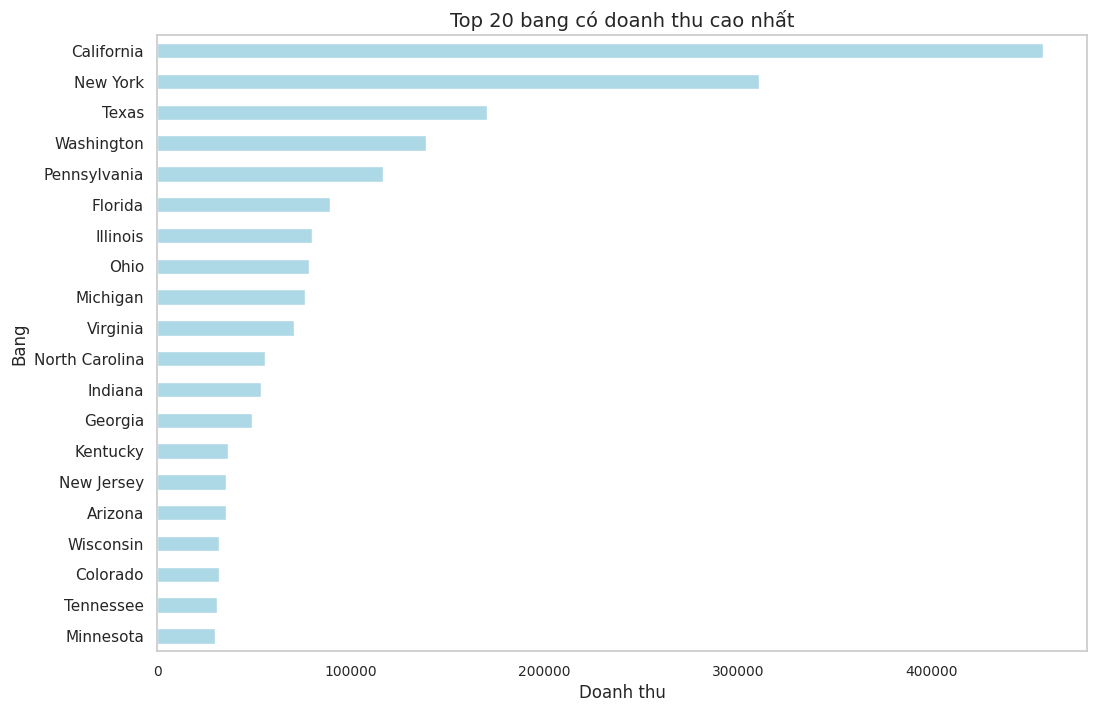

In [158]:
# Sắp xếp dữ liệu theo 'Sales'
df_states_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12,8))
#sns.barplot(x='Sales', y='State', data=df_states_sales, palette='viridis')
df_states_sales[:20].plot(kind='barh', color='lightblue')

# Đặt tiêu đề cho biểu đồ và các trục
plt.title('Top 20 bang có doanh thu cao nhất', fontsize=14)
plt.ylabel('Bang', fontsize=12)
plt.xlabel('Doanh thu', fontsize=12)
plt.xticks(fontsize=10)
plt.gca().invert_yaxis()
plt.grid(False)
plt.show()


Biểu đồ thể hiện doanh thu bán hàng theo từng phân khúc khách hàng qua các năm (2014 - 2017).

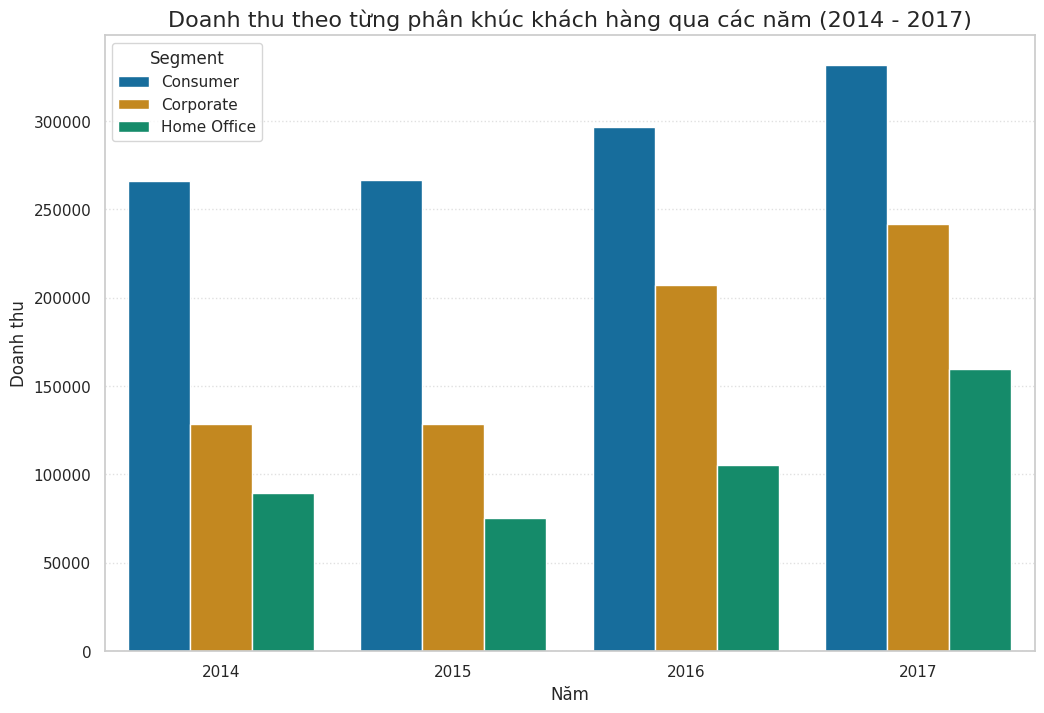

In [159]:
# Tạo một cột mới 'Order Year' để lưu trữ năm của mỗi đơn hàng
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Year'] = df['Order Date'].dt.year

# Tạo biểu đồ
plt.figure(figsize=(12, 8))
sns.barplot(x='Order Year', y='Sales', hue='Segment', data=df, palette='colorblind',estimator=sum, errorbar=None)
plt.title('Doanh thu theo từng phân khúc khách hàng qua các năm (2014 - 2017)', fontsize=16)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)

plt.grid(axis='y', linestyle='dotted', alpha=0.6)
plt.show()


Biểu đồ thể hiện tổng doanh thu bán hàng theo từng Sub-Category.

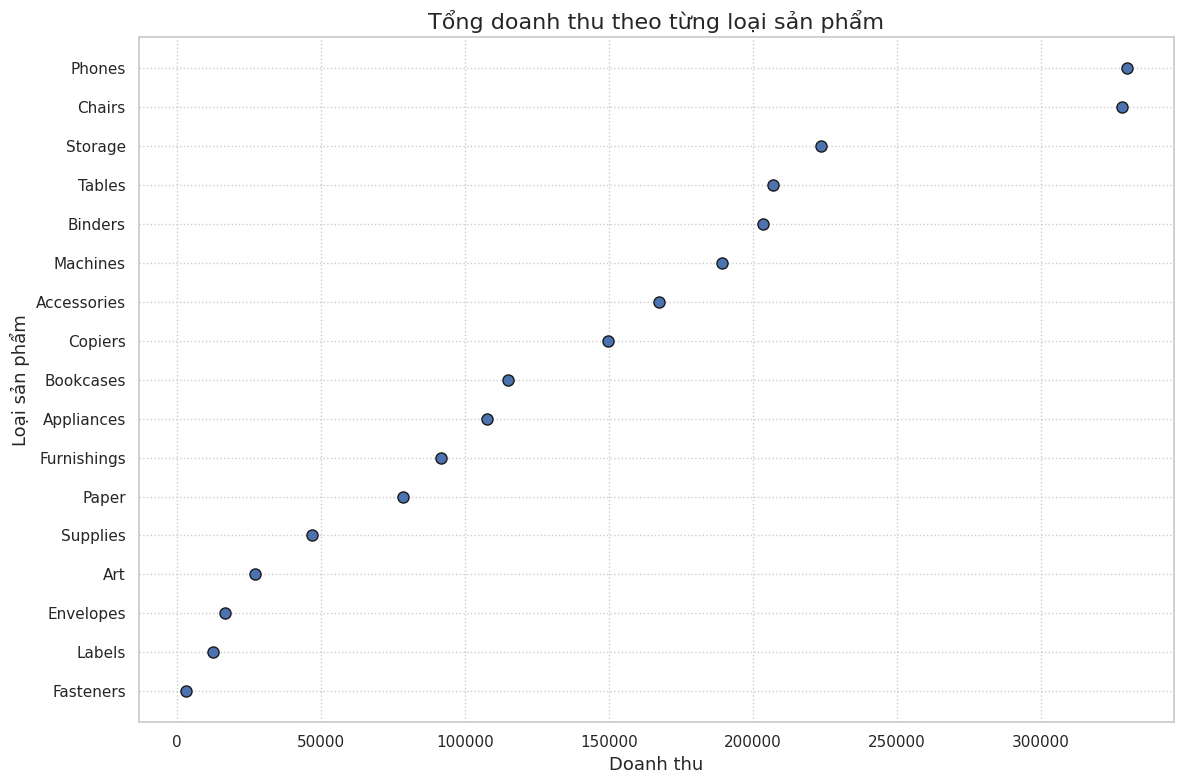

In [160]:
# Tính tổng doanh thu theo từng Sub-Category
sub_categories_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()

# Sắp xếp dữ liệu theo 'Sales'
sub_categories_sales = sub_categories_sales.sort_values('Sales')

sub_categories = sub_categories_sales['Sub-Category']
sales = sub_categories_sales['Sales']

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
plt.plot(sales, range(len(sub_categories)), 'o', markersize=8, markerfacecolor='b', markeredgecolor='k')
plt.title('Tổng doanh thu theo từng loại sản phẩm', fontsize=16)
plt.xlabel('Doanh thu', fontsize=13)
plt.ylabel('Loại sản phẩm', fontsize=13)

tick_interval = 1
plt.yticks(range(0, len(sub_categories), tick_interval), sub_categories[::tick_interval])
plt.grid(linestyle='dotted', alpha=1)
plt.tight_layout()
plt.show()


Biểu đồ thể hiện lợi nhuận theo từng năm.

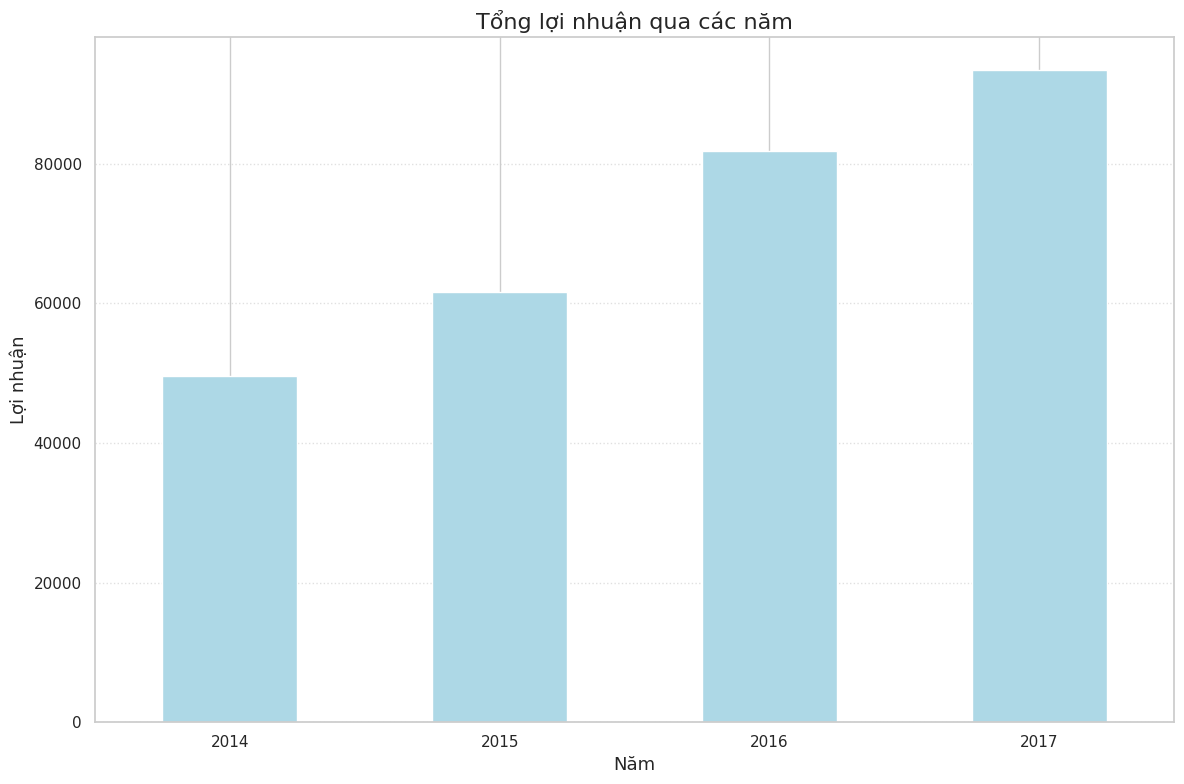

In [161]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Year'] = df['Order Date'].dt.year

# Nhóm dữ liệu theo 'Order Year' và tính tổng 'Profit'
grouped = df.groupby('Order Year')['Profit'].sum()

# Vẽ biểu đồ
plt.figure(figsize=(12,8))
grouped.plot(kind='bar', color='lightblue')
plt.title('Tổng lợi nhuận qua các năm', fontsize=16)
plt.xlabel('Năm', fontsize=13)
plt.ylabel('Lợi nhuận', fontsize=13)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='dotted', alpha=0.6)
plt.tight_layout()

plt.show()


Biểu đồ thể hiện tổng lợi nhuận theo Region và Category.

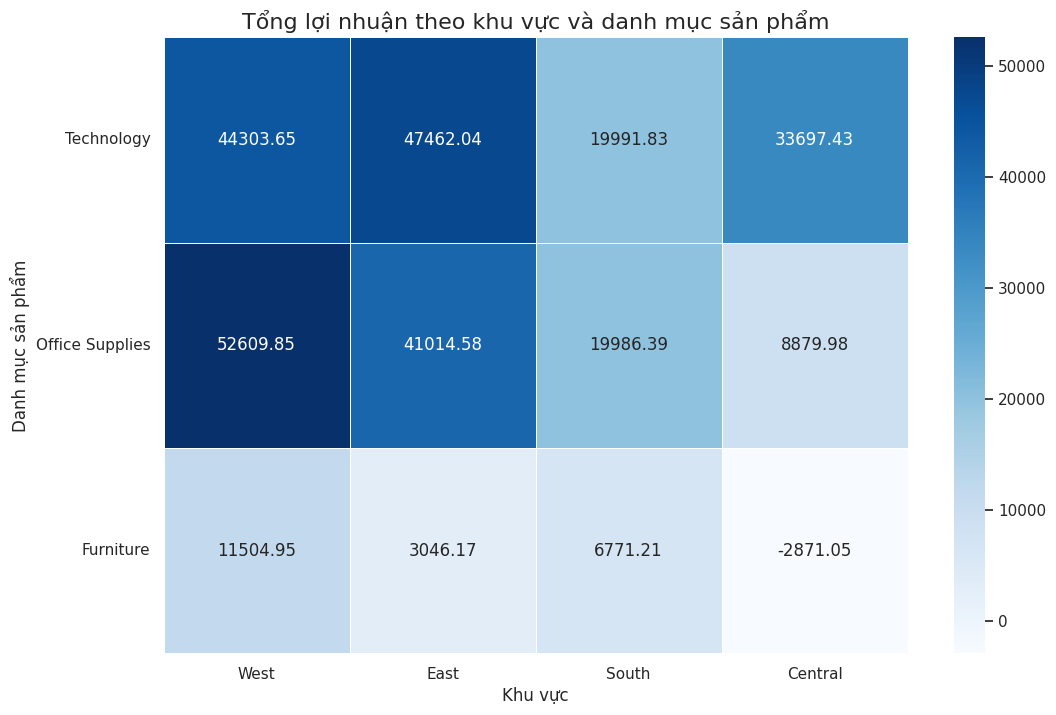

In [162]:
# Tạo bảng pivot
pivot_table = df.pivot_table(values='Profit', index='Category', columns='Region', aggfunc='sum')
region_profits = df.groupby('Region')['Profit'].sum()
category_profits = df.groupby('Category')['Profit'].sum()
pivot_table = pivot_table.loc[category_profits.sort_values(ascending=False).index]
pivot_table = pivot_table[region_profits.sort_values(ascending=False).index]
# Vẽ heatmap
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(pivot_table, cmap='Blues', annot =True, fmt=".2f", linewidths=.5)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

region_profits = region_profits.sort_values(ascending=True)
category_profits = category_profits.sort_values(ascending=True)

plt.title('Tổng lợi nhuận theo khu vực và danh mục sản phẩm', fontsize=16)
plt.xlabel('Khu vực', fontsize=12)
plt.ylabel('Danh mục sản phẩm', fontsize=12)

plt.show()


Biểu đồ tổng doanh thu và lợi nhuận theo từng khu vực

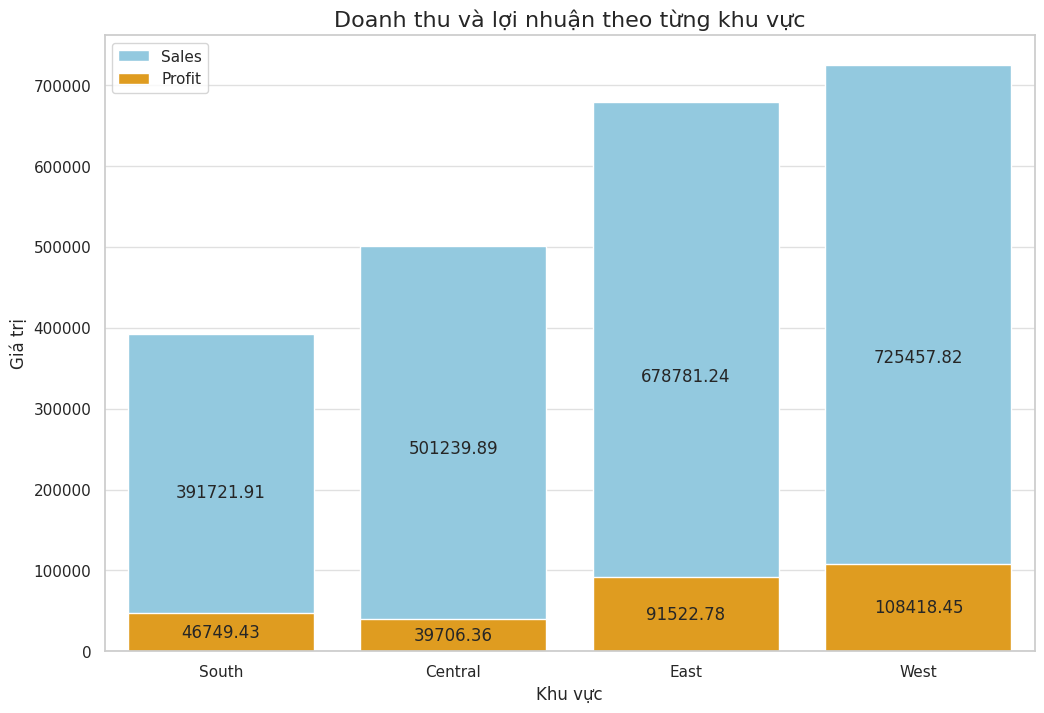

In [163]:
# Tính tổng doanh thu và lợi nhuận theo từng khu vực
sub_category_sales_profit = df.groupby('Region')[['Sales','Profit']].sum().reset_index()

sub_category_sales_profit = sub_category_sales_profit.sort_values(by=['Sales', 'Profit'])
# Vẽ biểu đồ
plt.figure(figsize=(12,8))

bar1 = sns.barplot(x='Region', y='Sales', data=sub_category_sales_profit, color='skyblue', label='Sales')
bar2 = sns.barplot(x='Region', y='Profit', data=sub_category_sales_profit, color='orange', label='Profit')

plt.title('Doanh thu và lợi nhuận theo từng khu vực', fontsize=16)
plt.xlabel('Khu vực', fontsize=12)
plt.ylabel('Giá trị', fontsize=12)

for p in bar2.patches:
    height = p.get_height()
    bar2.text(p.get_x()+p.get_width()/2.,
            height / 2,
            '{:1.2f}'.format(height),
            ha="center", va='center', fontsize=12)

plt.grid(axis='y', linestyle='-', alpha=0.6)

plt.legend()
plt.show()


Biểu đồ thể hiện số lượng sản phẩm đã bán theo từng năm và từng khu vực

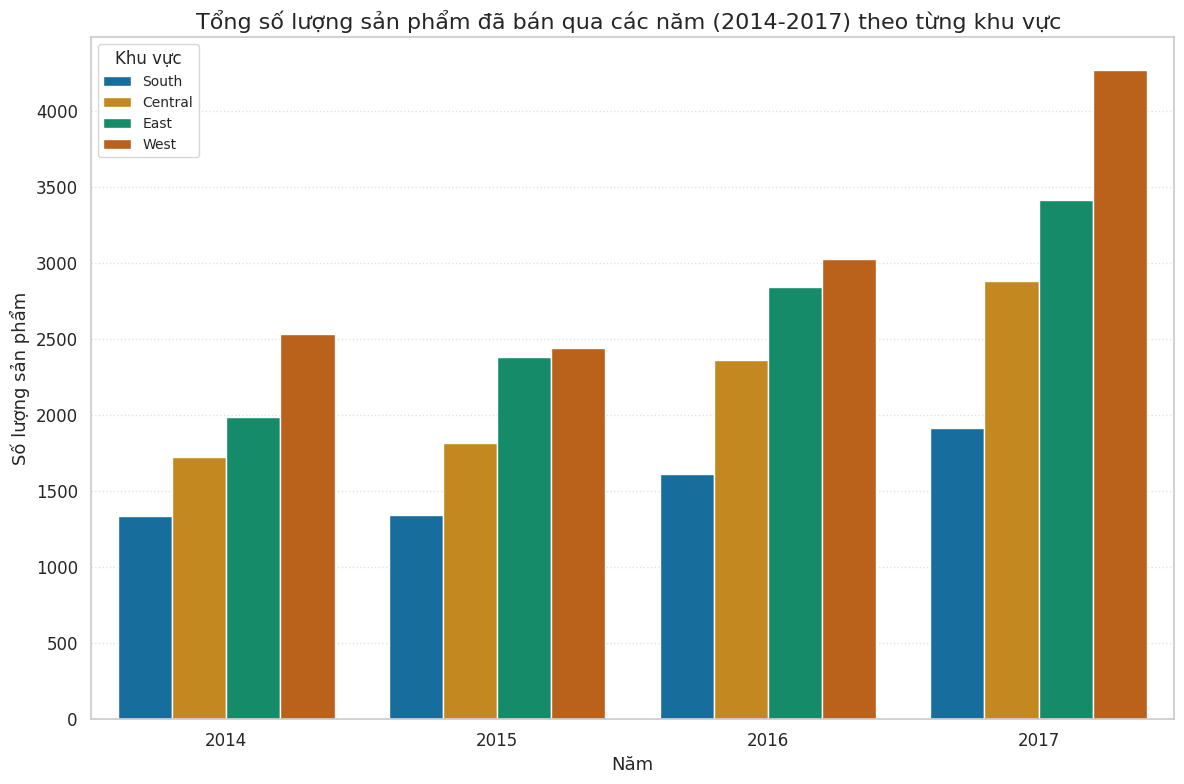

In [164]:
# Tính tổng số lượng sản phẩm đã bán qua các năm
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Year'] = df['Order Date'].dt.year
grouped = df.groupby(['Order Year', 'Region'])['Quantity'].sum().reset_index()
custom_order = ['South', 'Central', 'East', 'West']
plt.figure(figsize=(12, 8))
sns.barplot(x='Order Year', y='Quantity', hue='Region', data=grouped, palette='colorblind', hue_order=custom_order)

# Vẽ biểu đồ
plt.title('Tổng số lượng sản phẩm đã bán qua các năm (2014-2017) theo từng khu vực ', fontsize=16)
plt.xlabel('Năm', fontsize=13)
plt.ylabel('Số lượng sản phẩm', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Khu vực', title_fontsize='12', fontsize='10')
plt.grid(axis='y', linestyle='dotted', alpha=0.6)

plt.tight_layout()
plt.show()


Thống kê 20 thành phố có số lượng đơn hàng nhiều nhất

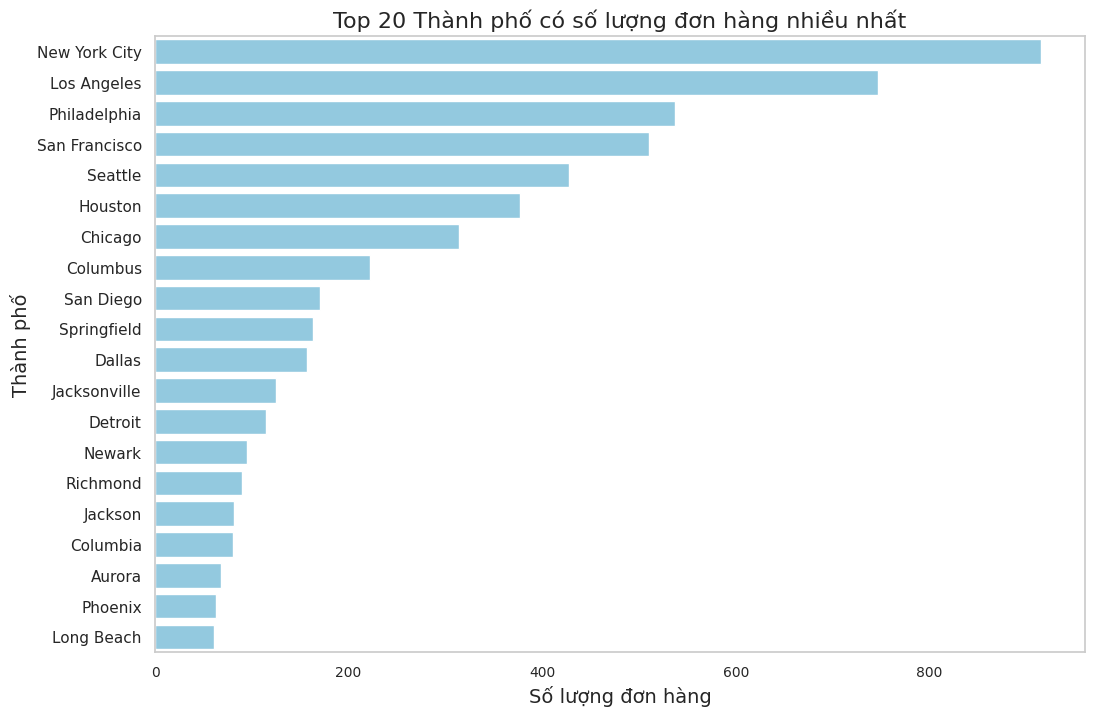

In [165]:
# Chọn ra các thành phố có nhiều đơn hàng nhất
cities_orders = df['City'].value_counts()
top_cities_orders = cities_orders.nlargest(20)

# Vẽ biểu đồ
plt.figure(figsize=(12,8))
sns.barplot(x=top_cities_orders.values, y=top_cities_orders.index, color='skyblue')

plt.title('Top 20 Thành phố có số lượng đơn hàng nhiều nhất', fontsize=16)
plt.xlabel('Số lượng đơn hàng', fontsize=14)
plt.ylabel('Thành phố', fontsize=14)
plt.xticks(fontsize=10)
plt.grid(False)
plt.show()


## Biểu đồ thể hiện tỉ lệ.

Biểu đồ thể hiện tỷ lệ đơn hàng trong trừng danh mục sản phẩm.

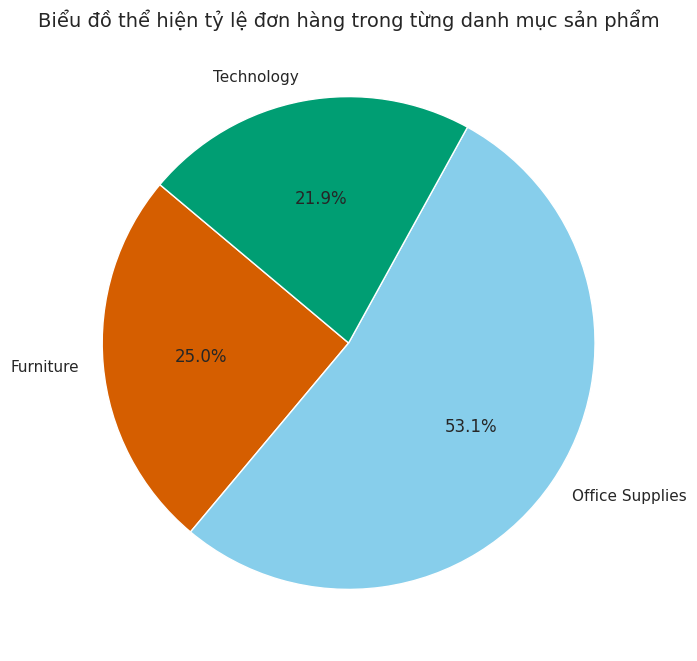

In [166]:
# Tính số lượng giá trị duy nhất của 'Order ID' trong mỗi Category
unique_order_ids_per_category = df.groupby('Category')['Order ID'].nunique()

# Tạo biểu đồ tròn
colors = ['#D55E00', 'skyblue', '#009E73']
plt.figure(figsize=(12, 8))
plt.pie(unique_order_ids_per_category, labels=unique_order_ids_per_category.index,
        autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Biểu đồ thể hiện tỷ lệ đơn hàng trong từng danh mục sản phẩm', fontsize=14)
plt.show()

Biểu đồ thể hiện doanh thu và lợi nhuận hàng bán với mỗi phân khúc khách hàng.

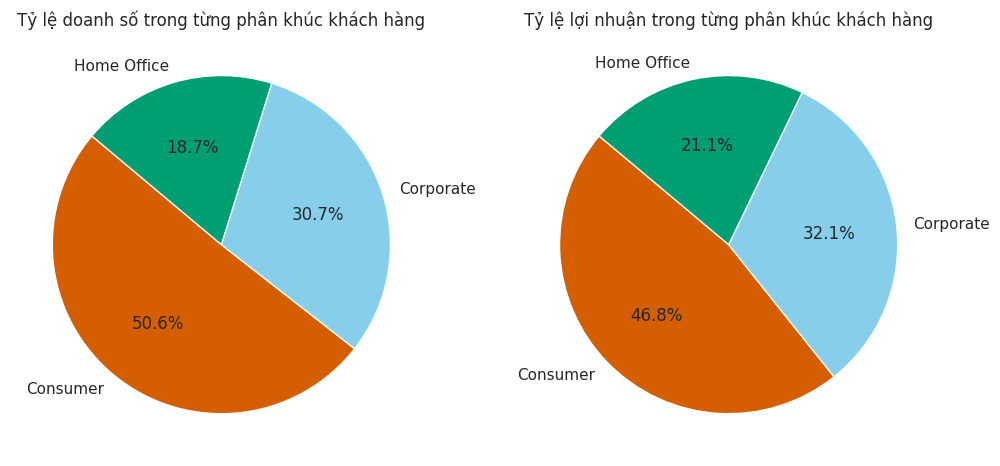

<Figure size 1200x800 with 0 Axes>

In [167]:
# Tính tỷ lệ doanh số trong từng phân khúc khách hàng
sales_per_segment = df.groupby(['Segment'])['Sales'].sum()

# Tính tỷ lệ lợi nhuận trong từng phân khúc khách hàng
Profit_per_segment = df.groupby(['Segment'])['Profit'].sum()

# Tạo subplot với 1 dòng và 2 cột
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
colors = ['#D55E00', 'skyblue', '#009E73']

# Biểu đồ tỷ lệ doanh số màu mặc định
axes[0].pie(sales_per_segment, labels=sales_per_segment.index, autopct='%1.1f%%', startangle=140, colors = colors)
axes[0].set_title('Tỷ lệ doanh số trong từng phân khúc khách hàng')

# Biểu đồ tỷ lệ lợi nhuận màu mặc định
axes[1].pie(Profit_per_segment, labels=Profit_per_segment.index, autopct='%1.1f%%', startangle=140, colors = colors)
axes[1].set_title('Tỷ lệ lợi nhuận trong từng phân khúc khách hàng')

plt.figure(figsize=(12, 8))
plt.tight_layout()
plt.show()

Lợi nhuận nhận về với mỗi phương thức giao hàng trong từng phân khúc khách hàng.

Biểu đồ thể hiện số sản phẩm đã bán trong mỗi doanh mục.

In [168]:
quantity_data = df.groupby(['Category', 'Sub-Category'])['Quantity'].sum().reset_index()
# Tạo biểu đồ treemap bằng Plotly Express
fig = px.treemap(quantity_data,
                 path=['Category', 'Sub-Category'],
                 values='Quantity',
                 title='Tỉ lệ đơn hàng của từng loại hình sản phẩm trong mỗi danh mục')

fig.update_layout(width=800, height=600)
fig.show()

Biểu đồ thể hiện doanh thu theo từng khu vực và danh mục sản phẩm.

In [169]:
# Tạo DataFrame mới với doanh thu theo từng khu vực và danh mục sản phẩm
df_revenue = df.groupby(['Region', 'Category']).sum()['Sales'].reset_index()

# Vẽ TreeMap
fig = px.treemap(df_revenue,
                 path=['Region', 'Category'],
                 values='Sales',
                 color_continuous_scale='blues',
                 title='Doanh thu các danh mục sản phẩm theo từng khu vực')
fig.update_layout(width=1000, height=600)
fig.show()

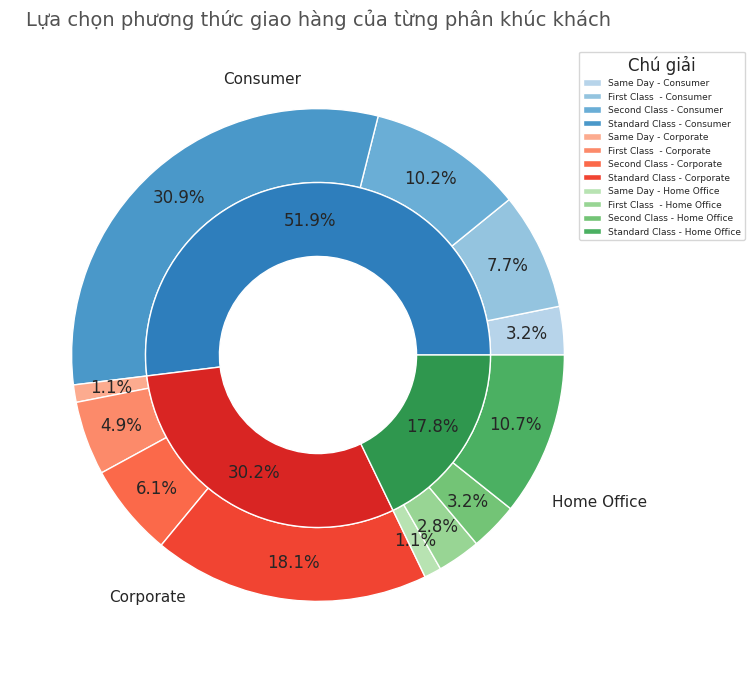

In [170]:
grouped_data = df.groupby(["Segment", "Ship Mode"])["Profit"].count()
grouped_data = pd.DataFrame(grouped_data.reset_index())
grouped_data = grouped_data.sort_values(by = ['Segment', 'Profit'])
grouped_data = grouped_data.reset_index()
grouped_data.drop(columns = 'index', inplace = True)
#print(grouped_data)
font_color = '#525252'
labelsout = ['Same Day - Consumer','First Class  - Consumer','Second Class - Consumer', 'Standard Class - Consumer',
             'Same Day - Corporate','First Class  - Corporate','Second Class - Corporate', 'Standard Class - Corporate',
             'Same Day - Home Office','First Class  - Home Office','Second Class - Home Office', 'Standard Class - Home Office']
labelsin = ['Consumer', 'Corporate', 'Home Office']
size = 0.3
vals = grouped_data['Profit']
#print(vals)
group_sum = grouped_data.groupby('Segment')['Profit'].sum()
#print(group_sum)
# group_sum = pd.DataFrame(group_sum.reset_index())
# group_sum1 = sorted(group_sum['Profit'])

fig, ax = plt.subplots(figsize=(12,8))

a,b,c= [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

outer_colors = [a(.7), b(.7), c(.7)]
inner_colors = [a(.3), a(.4), a(.5), a(.6),
                b(.3), b(.4), b(.5), b(.6),
                c(.3), c(.4), c(.5), c(.6)]

ax.pie(vals,
       radius=1,
       colors=inner_colors,autopct='%1.1f%%', pctdistance=0.85,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(group_sum,
       radius=1 - size,
       colors=outer_colors,
       labels = labelsin,
       labeldistance = 1.6,
       autopct='%1.1f%%', pctdistance=0.78,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.legend(title = 'Chú giải', labels=labelsout, loc="upper right", bbox_to_anchor=(1.2, 1), fontsize = 6.5)



ax.set_title('Lựa chọn phương thức giao hàng của từng phân khúc khách', fontsize=14, pad=15, color=font_color)

fig.show()

## Biểu đồ thể hiện sự phân phối.

Biểu đồ thể hiện phân phối của doanh thu và lợi nhuận

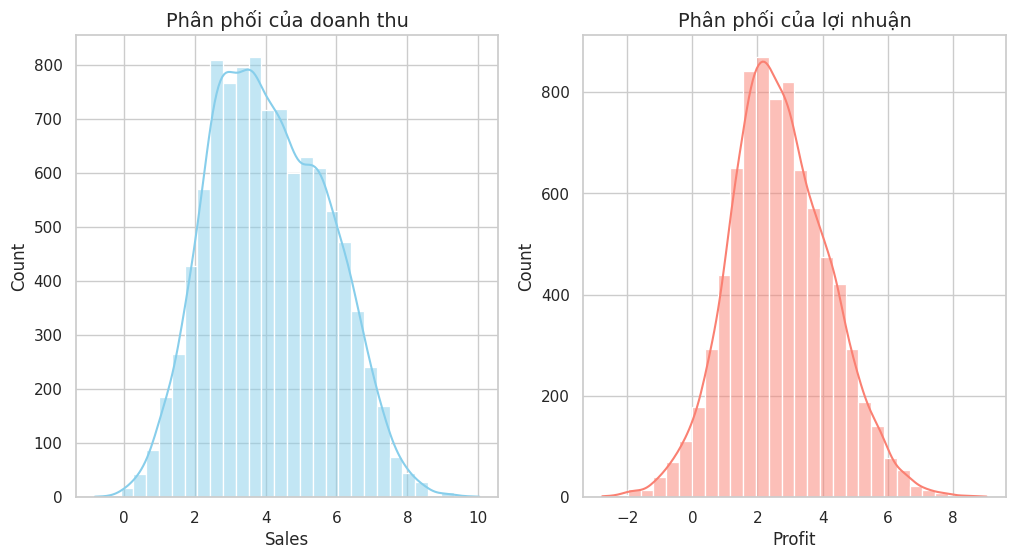

In [171]:
## bằng biểu đồ Histogram
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(np.log(df['Sales']), kde=True, color='skyblue', bins=30, ax=axes[0])
axes[0].set_title('Phân phối của doanh thu', fontsize=14)

sns.histplot(np.log(df['Profit']), kde=True, color='salmon', bins=30, ax=axes[1])
axes[1].set_title('Phân phối của lợi nhuận', fontsize=14)

plt.show()

Biểu đồ phân phối của doanh số (Sales) theo danh mục sản phẩm (Category)

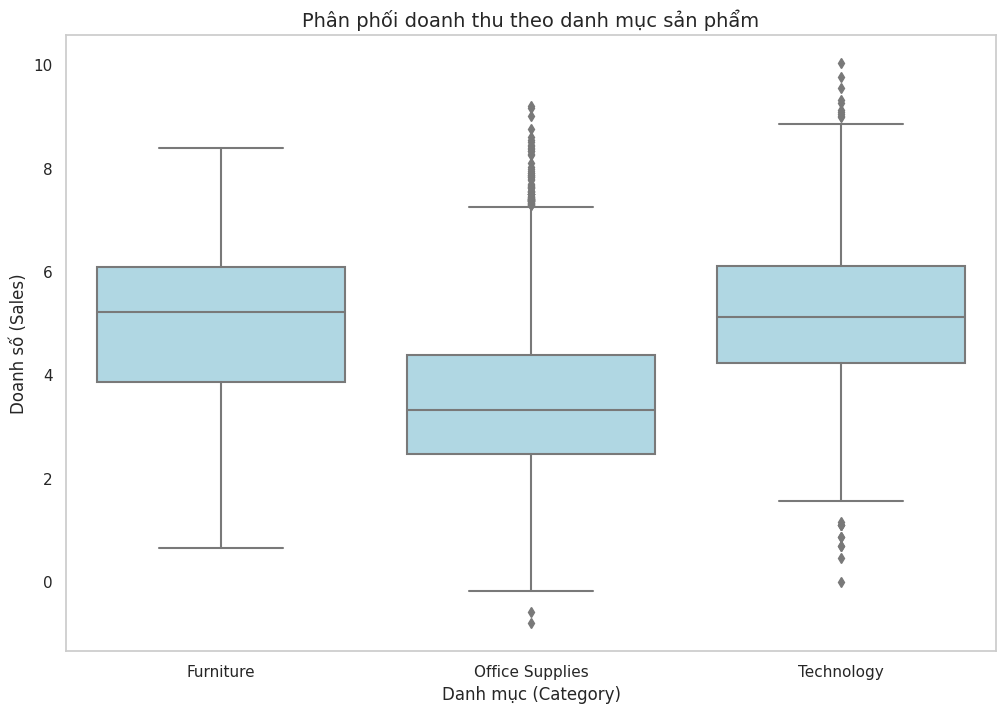

In [172]:
# Áp dụng log cho 'Sales' và 'Profit'
df['Sales_log'] = np.log(df['Sales'])
df['Profit_log'] = np.log(df['Profit'])
## Biểu diễn phân phối của doanh số (Sales) theo danh mục sản phẩm (Category)
## bằng biểu đồ Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Sales_log', data=df,
            color = 'lightblue',
            saturation = 0.9)
plt.title('Phân phối doanh thu theo danh mục sản phẩm', fontsize=14)
plt.xlabel('Danh mục (Category)')
plt.ylabel('Doanh số (Sales)')
plt.grid(False)
plt.show()

Biểu đồ đường gân mòn để thể hiện số tiền lời theo từng phương thức vận chuyển.

In [173]:
# Chuyển cột dữ liệu sang numpy
shipmode_profits = df.groupby('Ship Mode')['Profit'].apply(np.array).to_dict()
# Áp dụng logscale để dễ nhìn hơn
profits = [np.log1p(array[array > 0]) for array in shipmode_profits.values()]
# Vẽ biểu đồ
fig = ridgeplot(samples=profits,
                labels = ['First Class', 'Second Class', 'Standard Class', 'Same Day'],
                colorscale = 'blues_r',
                colormode = 'index',
                coloralpha=0.6)
fig.update_layout(
    title=dict(
        text = "Phân phối lợi nhuận theo từng phương thức vận chuyển",
        y=0.9,  # Adjust the y-coordinate for the top of the y-axis
        x=0.5,  # Set x-coordinate to 0.5 for the middle of the x-axis
        xanchor='center',  # Anchor point for x-axis
        yanchor='top'  # Anchor point for y-axis
    ),
    height=600,
    width=1100
)

fig.show()

## Biểu đồ thể hiện sự tương quan.

Dùng biểu đồ nhiệt để thể hiện sự tương quan giữa các biến kiểu số

Text(0.5, 1.0, 'Tương quan giữa các biến có dạng số')

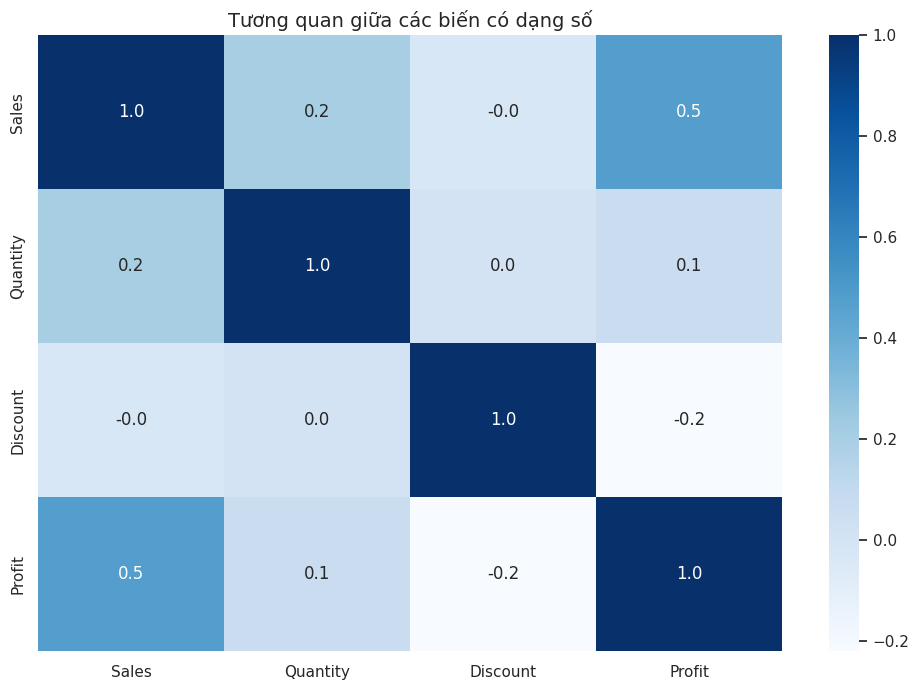

In [174]:
## Dùng heatmap thể hiến sự tương quan giữa các biến numeric
df['Month'] = df['Order Date'].dt.month
df['Month'] = pd.to_datetime(df['Order Date']).dt.month.astype(int)

df_con = df.select_dtypes(include=['int64', 'float64'])
df_con.drop(columns = ['Order Year', 'Sales_log','Profit_log','Month'], inplace = True)
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_con.corr(method='pearson'), annot=True, fmt= '.1f',
            ax=ax, cmap="Blues")
plt.title('Tương quan giữa các biến có dạng số', fontsize=14)

Sử dụng phương pháp chi bình phương để kiểm định tính tương quan giữa các biến định danh.

In [175]:
df.select_dtypes(include = 'object').columns.to_list()

['Order ID',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name']

In [190]:
## Correlation map giữa các biến categorical
#1. Tạo dataframe với tất cả các biến categorical
cal_var = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']
categorical_col = df[cal_var]
categorical_col.head()

,Ship Mode,Segment,Region,Category,Sub-Category
0,Second Class,Consumer,South,Furniture,Bookcases
1,Second Class,Consumer,South,Furniture,Chairs
2,Second Class,Corporate,West,Office Supplies,Labels
3,Standard Class,Consumer,South,Furniture,Tables
4,Standard Class,Consumer,South,Office Supplies,Storage


In [192]:
#2. Tách thành 2 bảng
cat_var1 = tuple(categorical_col.columns.to_list())
cat_var2 = tuple(categorical_col.columns.to_list())

#3. Chi test
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            categorical_col[i[0]], categorical_col[i[1]])))[1]))
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2',
                                                       'coeff'])

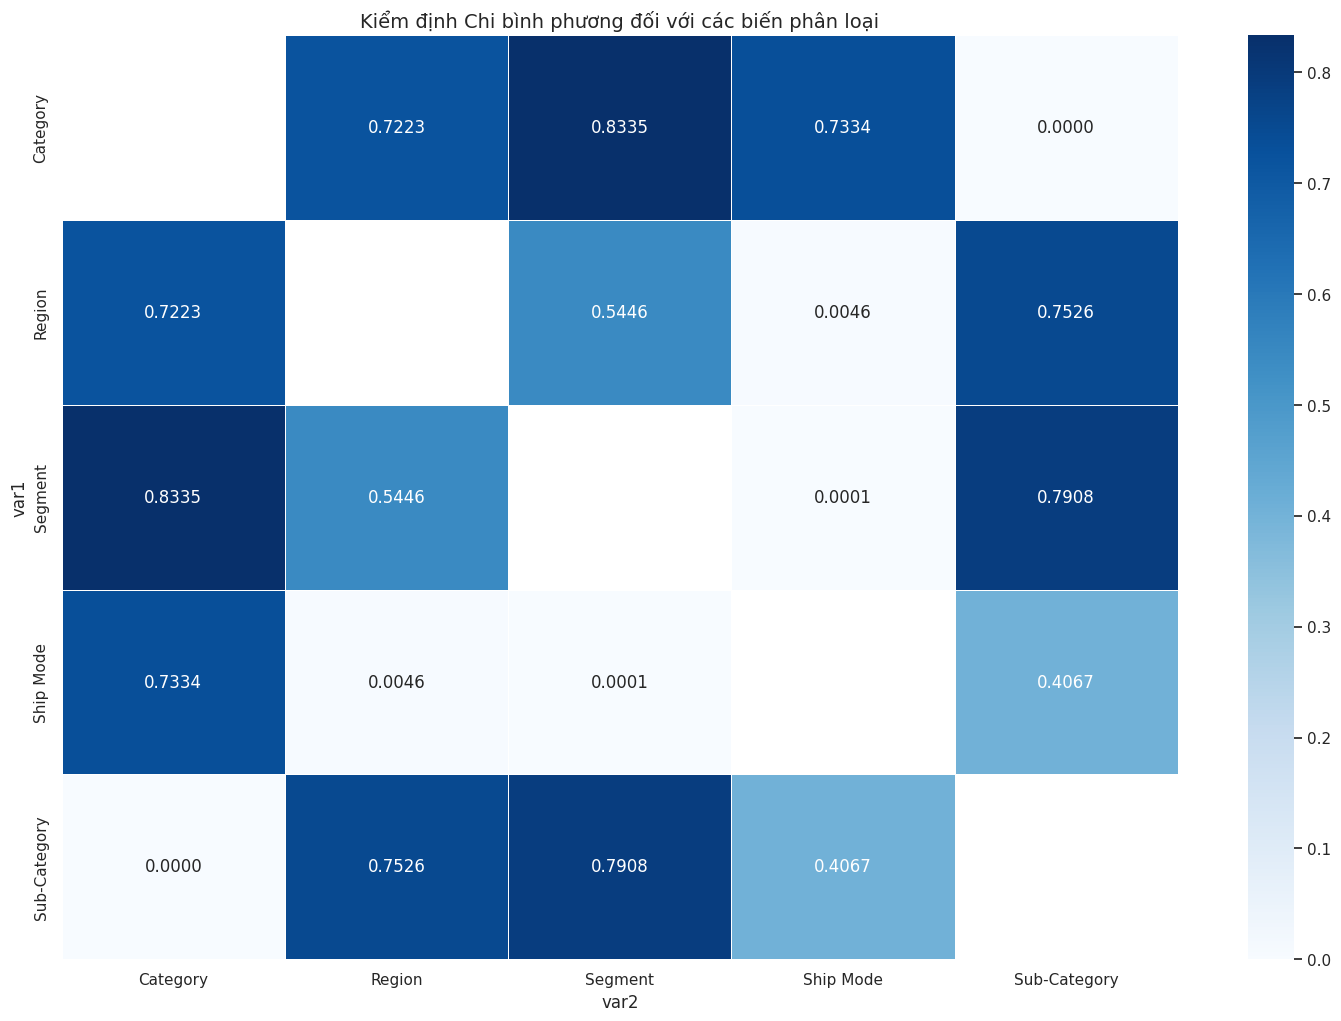

In [193]:
#4. Tạo biểu đồ
heatmap_data = chi_test_output.pivot(index='var1', columns='var2', values='coeff')
plt.figure(figsize=(18, 12))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='.4f', linewidths=.5)
plt.title('Kiểm định Chi bình phương đối với các biến phân loại', fontsize=14)
plt.grid(False)
plt.show()

Biểu đồ phân tán (có độ lệch) giữa lợi nhuận và hệ số chiết khấu

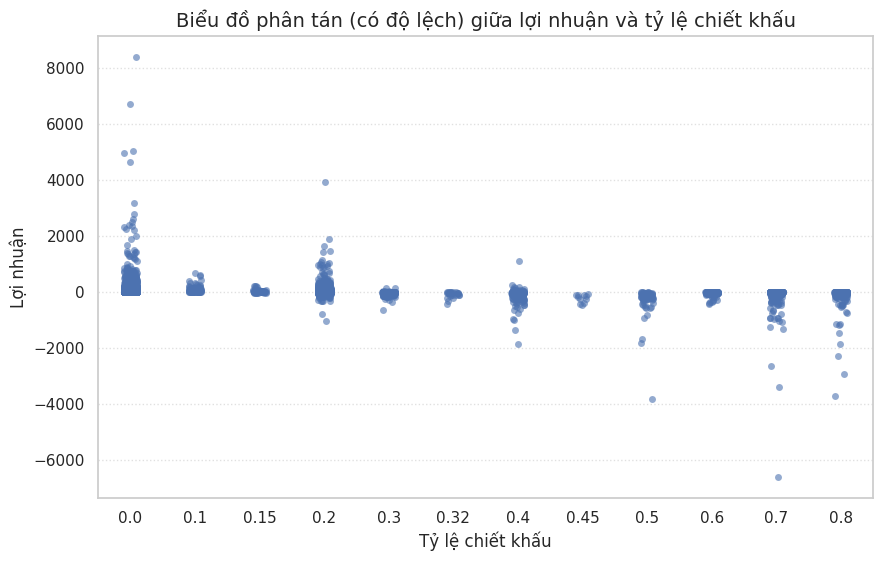

In [179]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))


# Add jitter to 'Discount' and 'Profit'
sns.stripplot(x='Discount', y='Profit', data=df, alpha=0.6, jitter = True)

# Set plot title and labels
plt.title('Biểu đồ phân tán (có độ lệch) giữa lợi nhuận và tỷ lệ chiết khấu', fontsize=14)
plt.xlabel('Tỷ lệ chiết khấu')
plt.ylabel('Lợi nhuận')
plt.grid(axis='y', linestyle='dotted', alpha=0.6)
# Display the plot
plt.show()


## Biểu đồ thể hiện dữ liệu chuỗi thời gian và xu thế.

Biểu đồ thể hiện tương quan giữa tiền lãi và tiền thu tại Quý 4 Năm 2017 của cửa hàng.

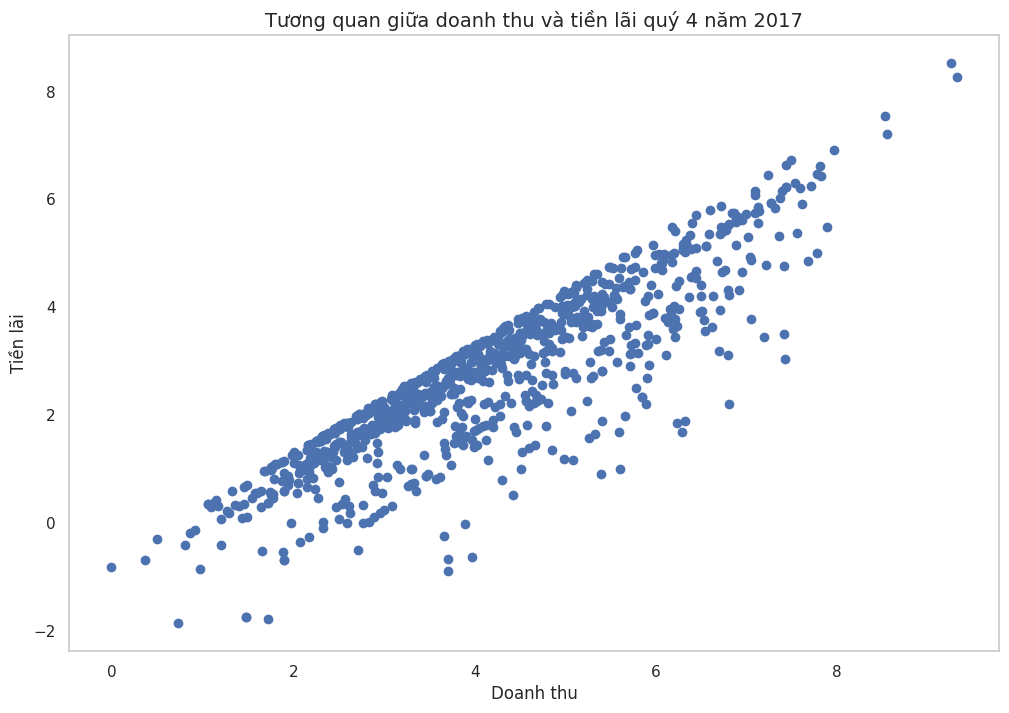

In [180]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
filtered_df = df[(df['Order Date'].dt.year == 2017) & (df['Order Date'].dt.quarter == 4) & (df['Profit'] > 0)]
filtered_df['Profit'] = np.log(filtered_df['Profit'])
filtered_df['Sales'] = np.log(filtered_df['Sales'])

plt.figure(figsize=(12, 8))
plt.scatter(filtered_df['Sales'], filtered_df['Profit'])
plt.title('Tương quan giữa doanh thu và tiền lãi quý 4 năm 2017', fontsize=14)
plt.xlabel('Doanh thu')
plt.ylabel('Tiền lãi')
plt.grid(False)
plt.show()

In [181]:
corr, _ = pearsonr(filtered_df['Profit'], filtered_df['Sales'])
print("Chỉ số Pearson giữa Profit và Sales:", corr)

Chỉ số Pearson giữa Profit và Sales: 0.8785875795998868


Dùng phương pháp LOESS và đường hồi quy tuyến tính để thể hiện xu thế giữa doanh thu và tiền lãi tại Quý 4 Năm 2017

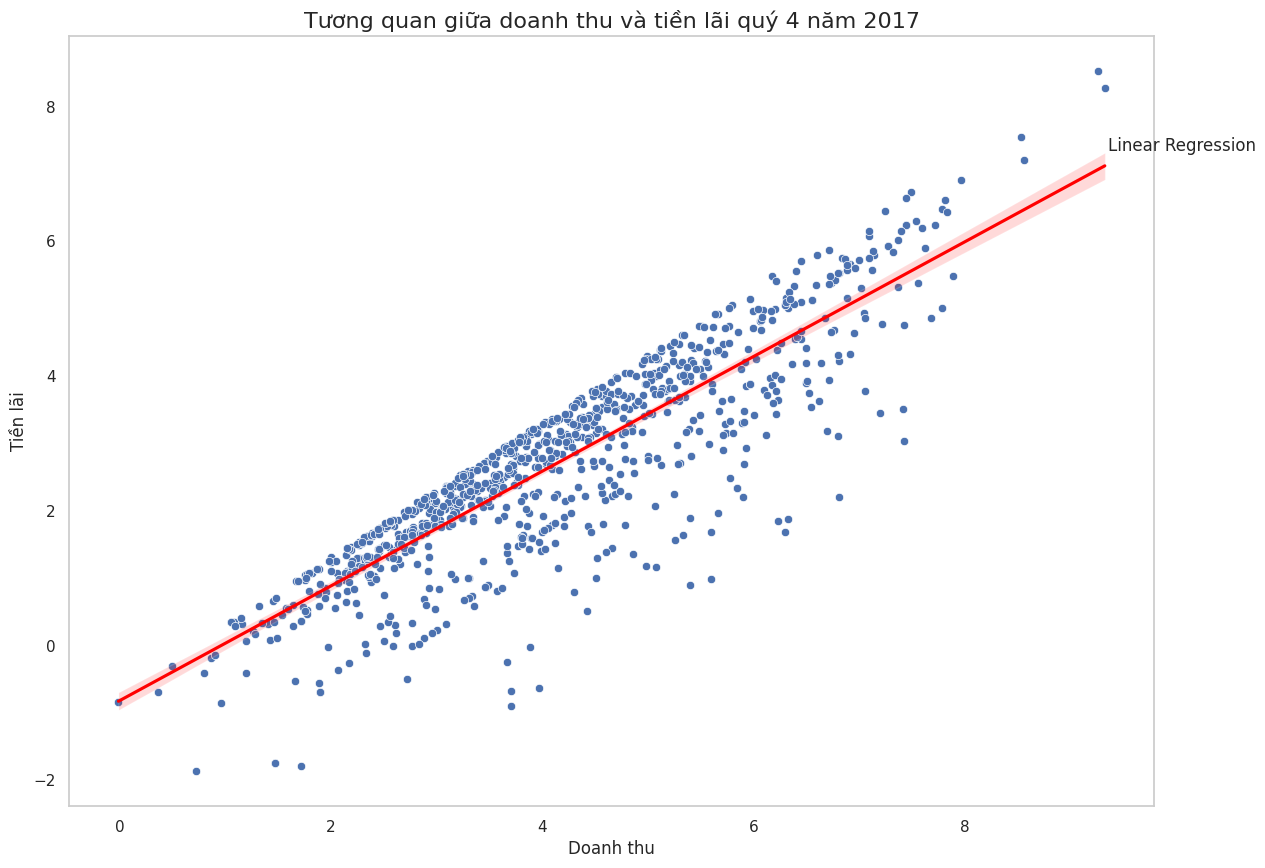

In [182]:
filtered_df = df[(df['Order Date'].dt.year == 2017) & (df['Order Date'].dt.quarter == 4) & (df['Profit'] > 0)]
filtered_df['Profit'] = np.log(filtered_df['Profit'])
filtered_df['Sales'] = np.log(filtered_df['Sales'])

fig, ax = plt.subplots(figsize=(14, 10))
sns.scatterplot(data = filtered_df, x='Sales', y='Profit')
sns.regplot(data = filtered_df, x='Sales', y='Profit', scatter=False, color='red')

plt.text(9.35, 7.34, 'Linear Regression', fontsize=12)
plt.title('Tương quan giữa doanh thu và tiền lãi quý 4 năm 2017', fontsize = 16)
plt.xlabel('Doanh thu')
plt.ylabel('Tiền lãi')
plt.grid(False)
plt.show()

Biểu đồ doanh thu bán hàng trong Q4/2017 kết hợp đường trung bình động để thấy rõ xu thế của doanh số bán hàng.

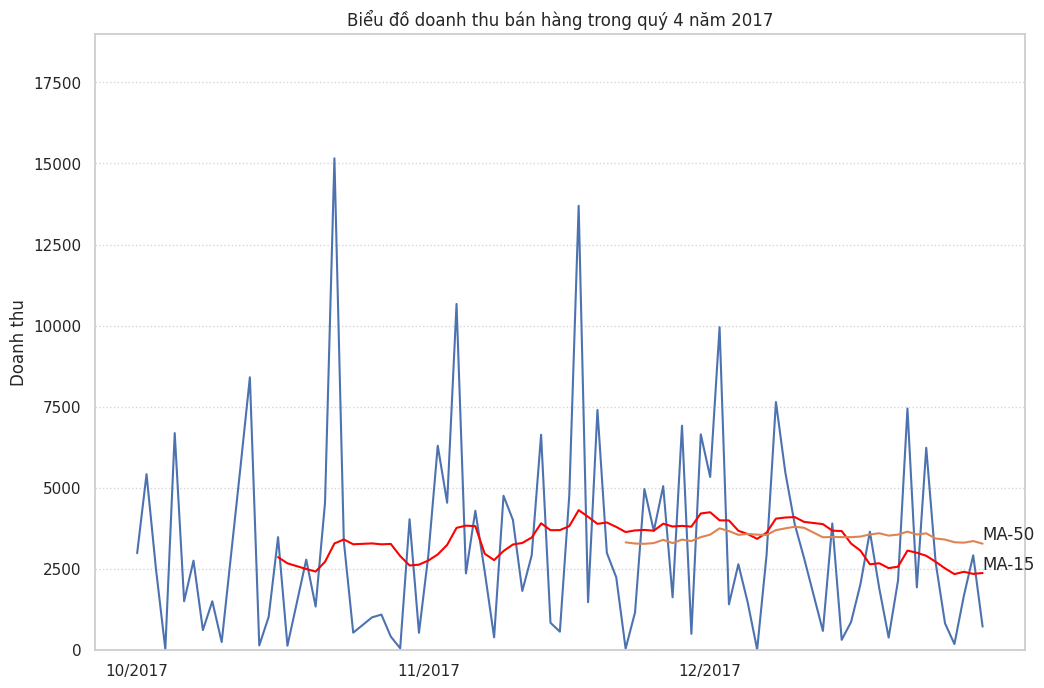

In [183]:
filtered_df = df[(df['Order Date'].dt.year == 2017) & (df['Order Date'].dt.quarter == 4)]
sale_per_date = filtered_df.groupby('Order Date')['Sales'].sum()
sale_per_date = pd.DataFrame(sale_per_date.reset_index())

# Tạo 2 đương MA-15 và MA-50
sale_per_date['MA-15'] = sale_per_date['Sales'].rolling(window=15).mean()
sale_per_date['MA-50'] = sale_per_date['Sales'].rolling(window=50).mean()

# Tạo biểu đồ
plt.figure(figsize=(12,8))
plt.grid(visible=True, which='both', axis='both', alpha=0.8)  # Apply grid to both axes
plt.gca().xaxis.grid(color='white', linestyle='-', linewidth=0.5)
plt.plot(sale_per_date['Order Date'], sale_per_date['Sales'], label='Sales')
plt.plot(sale_per_date['Order Date'], sale_per_date['MA-15'], color = 'red', label='MA-15')
plt.plot(sale_per_date['Order Date'], sale_per_date['MA-50'], label='MA-50')

# Điều chỉnh trục tung
plt.ylim(0,19000)

# Điều chỉnh giá trị trên trục hoành
start_date = filtered_df['Order Date'].min()
middle_date = filtered_df['Order Date'].min() + timedelta(days=1) + (filtered_df['Order Date'].max() - filtered_df['Order Date'].min()) // 3
end_date = filtered_df['Order Date'].max() + timedelta(days=1) - (filtered_df['Order Date'].max() - filtered_df['Order Date'].min()) // 3
formatted_labels = [d.strftime('%m/%Y') for d in [start_date, middle_date, end_date]]
plt.xticks([start_date, middle_date, end_date], formatted_labels)

plt.ylabel('Doanh thu')
plt.title('Biểu đồ doanh thu bán hàng trong quý 4 năm 2017')
plt.text(sale_per_date['Order Date'].iloc[-1], sale_per_date['MA-15'].iloc[-1], 'MA-15', ha='left', va='bottom')
plt.text(sale_per_date['Order Date'].iloc[-1], sale_per_date['MA-50'].iloc[-1], 'MA-50', ha='left', va='bottom')
plt.grid(linestyle='dotted', alpha=0.8)
plt.show()

So sánh doanh thu Q4/2016 và Q4/2017

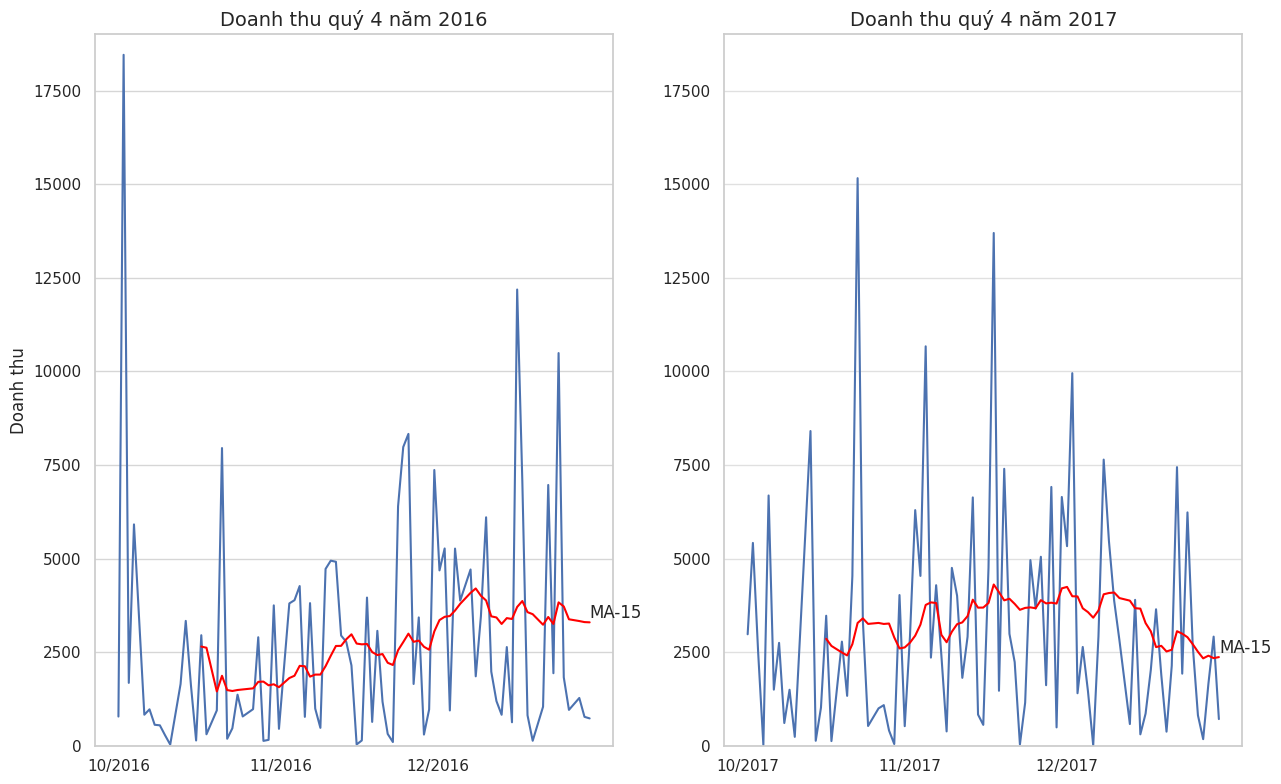

In [184]:
filtered_df = df[(df['Order Date'].dt.quarter == 4) & (df['Order Date'].dt.year.isin([2016, 2017]))]
sale_per_date = filtered_df.groupby('Order Date')['Sales'].sum()
sale_per_date = pd.DataFrame(sale_per_date.reset_index())

plt.figure(figsize=(13, 8))

## Tạo subplot 2016
plt.subplot(1, 2, 1)
plt.grid(visible=True, which='both', axis='both', alpha=0.8)  # Apply grid to both axes
plt.gca().xaxis.grid(color='white', linestyle='-', linewidth=0.5)
plt.plot(sale_per_date[sale_per_date['Order Date'].dt.year == 2016]['Order Date'], sale_per_date[sale_per_date['Order Date'].dt.year == 2016]['Sales'])
plt.plot(sale_per_date[sale_per_date['Order Date'].dt.year == 2016]['Order Date'],
         sale_per_date[sale_per_date['Order Date'].dt.year == 2016]['Sales'].rolling(window=15).mean(), color = 'red', label='MA-15')

# Căn chỉnh trục tung
plt.ylim(0, 19000)

# Điều chỉnh giá trị trên trục hoành
filtered_df2016 = filtered_df[filtered_df['Order Date'].dt.year == 2016]
start_date = filtered_df2016['Order Date'].min()
middle_date = filtered_df2016['Order Date'].min() + timedelta(days=1) + (filtered_df2016['Order Date'].max() - filtered_df2016['Order Date'].min()) // 3
end_date = filtered_df2016['Order Date'].max() + timedelta(days=1) - (filtered_df2016['Order Date'].max() - filtered_df2016['Order Date'].min()) // 3
formatted_labels = [d.strftime('%m/%Y') for d in [start_date, middle_date, end_date]]

# Thêm các chi tiết
plt.title('Doanh thu quý 4 năm 2016', fontsize=14)
plt.ylabel('Doanh thu')
plt.xticks([start_date, middle_date, end_date], formatted_labels)
plt.text(sale_per_date[sale_per_date['Order Date'].dt.year == 2016]['Order Date'].iloc[-1],
         sale_per_date[sale_per_date['Order Date'].dt.year == 2016]['Sales'].rolling(window=15).mean().iloc[-1], 'MA-15', ha='left', va='bottom')
#plt.grid(visible = True, which = 'both',axis = 'y', alpha=0.8)

## Tạo subplot 2017
plt.subplot(1, 2, 2)
plt.grid(visible=True, which='both', axis='both', alpha=0.8)  # Apply grid to both axes
plt.gca().xaxis.grid(color='white', linestyle='-', linewidth=0.5)
plt.plot(sale_per_date[sale_per_date['Order Date'].dt.year == 2017]['Order Date'], sale_per_date[sale_per_date['Order Date'].dt.year == 2017]['Sales'])
plt.plot(sale_per_date[sale_per_date['Order Date'].dt.year == 2017]['Order Date'],
         sale_per_date[sale_per_date['Order Date'].dt.year == 2017]['Sales'].rolling(window=15).mean(), color = 'red',label='MA-15')

# Căn chỉnh trục tung
plt.ylim(0, 19000)

# Điều chỉnh giá trị trên trục hoành
filtered_df2017 = filtered_df[filtered_df['Order Date'].dt.year == 2017]
start_date = filtered_df2017['Order Date'].min()
middle_date = filtered_df2017['Order Date'].min() + timedelta(days=1) + (filtered_df2017['Order Date'].max() - filtered_df2017['Order Date'].min()) // 3
end_date = filtered_df2017['Order Date'].max() + timedelta(days=1) - (filtered_df2017['Order Date'].max() - filtered_df2017['Order Date'].min()) // 3
formatted_labels = [d.strftime('%m/%Y') for d in [start_date, middle_date, end_date]]

# Thêm các chi tiết
plt.title('Doanh thu quý 4 năm 2017', fontsize=14)
plt.xticks([start_date, middle_date, end_date], formatted_labels)
plt.text(sale_per_date[sale_per_date['Order Date'].dt.year == 2017]['Order Date'].iloc[-1],
         sale_per_date[sale_per_date['Order Date'].dt.year == 2017]['Sales'].rolling(window=15).mean().iloc[-1], 'MA-15', ha='left', va='bottom')
plt.grid(axis = 'y', alpha=0.6)

plt.tight_layout()
plt.show()

Tốc độ tăng trường doanh thu từ 2014 - 2017

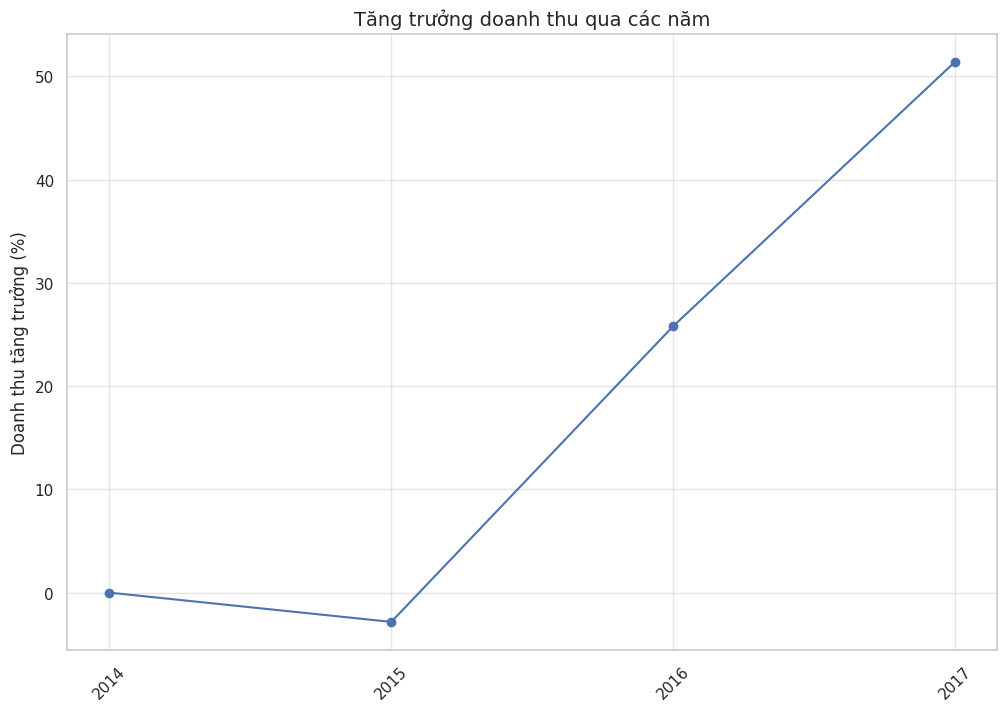

In [185]:
df['Year'] = df['Order Date'].dt.year
profit_per_year = df.groupby('Year')['Sales'].sum()
profit_per_year = pd.DataFrame(profit_per_year.reset_index())

# Tính toán tăng trưởng phần trăm và lưu vào cột mới
start_date = profit_per_year['Year'].min()
profit_per_year['Growth'] = ((profit_per_year['Sales'] - profit_per_year.loc[profit_per_year['Year'] == start_date, 'Sales'].values[0]) /
                          profit_per_year.loc[profit_per_year['Year'] == start_date, 'Sales'].values[0]) * 100

# Tạo biểu đồ
plt.figure(figsize = (12,8))
plt.plot(profit_per_year.index, profit_per_year['Growth'], marker='o')
plt.ylabel('Doanh thu tăng trưởng (%)')
plt.title('Tăng trưởng doanh thu qua các năm', fontsize=14)
plt.xticks(profit_per_year.index)
plt.xticks(profit_per_year.index, profit_per_year['Year'].astype(str), rotation=45)
plt.grid(alpha=0.5)
plt.show()

Biểu đồ thể hiện mức tăng trưởng doanh thu qua các năm ở từng khu vực.

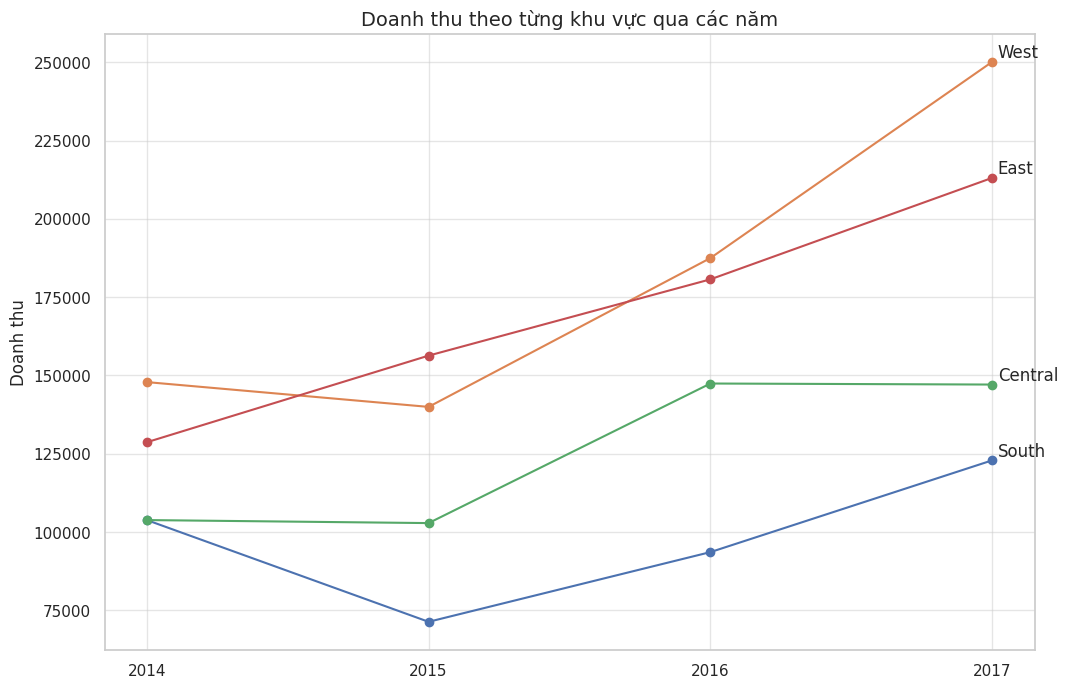

In [186]:
profit_per_year_region = df.groupby(['Year', 'Region'])['Sales'].sum()
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

# Tạo biểu đồ cho từng khu vực
for reg in df['Region'].unique():
  reg_data = profit_per_year_region.loc[:, reg]
  ax.plot(reg_data.index, reg_data, marker = 'o', label = reg)

  last_index = reg_data.index[-1]
  ax.text(last_index + 0.02, reg_data[last_index] +10, reg, ha = 'left', va = 'bottom')

# Thêm chi tiết
ax.set_ylabel('Doanh thu')
ax.set_xticks(reg_data.index)
ax.set_title('Doanh thu theo từng khu vực qua các năm', fontsize=14)
plt.grid(alpha=0.5)

plt.show()

## Biểu đồ thể hiện dữ liệu địa lý.

Phân bố doanh thu ở từng tiểu bang trong 4 năm

In [187]:
# Hàm để mã hóa tên tiểu bang thành code 2 chữ. VD: California -> CA
def code_2L (state_name):
    try:
        return pycountry.subdivisions.lookup(state_name).code
    except LookupError:
        return None

In [188]:
sale_per_state = df.groupby('State')['Sales'].sum()
sale_per_state = pd.DataFrame(sale_per_state.reset_index())
# Tạo cột từ bộ mã hóa và chỉnh các giá trị mã hóa sai
sale_per_state['Code'] = sale_per_state['State'].apply(code_2L)
sale_per_state['Code'] = sale_per_state['Code'].str[3:]
sale_per_state['Code'][24] = 'MT'
sale_per_state['Code'][18] = 'MD'

In [189]:
# Tạo map
fig = px.choropleth(sale_per_state, locations = 'Code', locationmode = 'USA-states', color = sale_per_state['Sales'],
                    scope = 'usa', title = 'Phân bố doanh thu theo từng tiểu bang', color_continuous_scale='Blues', hover_name = sale_per_state['State'])

# Thêm chú thích
trace = px.scatter_geo(sale_per_state, locationmode='USA-states', locations='Code', text='Code').data[0]
trace.marker.opacity = 0
trace.textfont.size = 13
fig.add_trace(trace)

# Căn chỉnh
fig.update_layout(width=1000, height=600)

fig.show()